In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
#Importing the dataset 
df=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleaned.csv")
test=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest.csv")
test2=pd.read_csv("/home/umair/Desktop/Data Science and BI/data mining/occupancy_data/DataCleanedTest2.csv")

In [3]:
#Drop the useless column
df.drop(['Unnamed: 0'], axis=1, inplace =True)
df.drop(['date'], axis=1, inplace =True)
df.drop(['DayName'], axis=1, inplace =True)

test.drop(['Unnamed: 0'], axis=1, inplace =True)
test.drop(['date'], axis=1, inplace =True)
test.drop(['DayName'], axis=1, inplace =True)

test2.drop(['Unnamed: 0'], axis=1, inplace =True)
test2.drop(['date'], axis=1, inplace =True)
test2.drop(['DayName'], axis=1, inplace =True)

In [4]:
test.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,Occupancy
0,1,14,1,23.7000,26.272,1.0,749.200000,1
1,1,14,1,23.7180,26.290,1.0,760.400000,1
2,1,14,1,23.7300,26.230,1.0,769.666667,1
3,1,14,1,23.7225,26.125,1.0,774.750000,1
4,1,14,1,23.7540,26.200,1.0,779.000000,1


In [5]:
df.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,Occupancy
0,1,17,1,23.18,27.2720,1.0,721.25,1
1,1,17,1,23.15,27.2675,1.0,714.00,1
2,1,17,1,23.15,27.2450,1.0,713.50,1
3,1,17,1,23.15,27.2000,1.0,708.25,1
4,1,17,1,23.10,27.2000,1.0,704.50,1


In [6]:
#preparing the two datasets splitting the attributes with the class and selecting the right attributes
attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_train = df[attributes].values
y_train = df['Occupancy']

attributes = [col for col in df.columns if 
              col == 'IsWorkDay' 
              or col == 'Hour' 
              or col == 'Light'
              or col == 'IsWorkHour'
              or col == 'Temperature' 
              or col == 'Humidity'
              or col == 'CO2'
              or col == 'HumidityRatio'
             ]
X_test = test[attributes].values
y_test = test['Occupancy']

attributes = [col for col in test2.columns if col != 'Occupancy']
X_test2 = test2[attributes]
y_test2 = test2['Occupancy']

In [7]:
df.head()

,IsWorkDay,Hour,IsWorkHour,Temperature,Humidity,Light,CO2,Occupancy
0,1,17,1,23.18,27.2720,1.0,721.25,1
1,1,17,1,23.15,27.2675,1.0,714.00,1
2,1,17,1,23.15,27.2450,1.0,713.50,1
3,1,17,1,23.15,27.2000,1.0,708.25,1
4,1,17,1,23.10,27.2000,1.0,704.50,1


In [8]:
#try the alghoritm with criterion=gini
clfG = DecisionTreeClassifier(criterion='gini', max_depth=3, 
                             min_samples_split=2)
clfG.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
#view the importace of the attributes
for col, imp in zip(attributes, clfG.feature_importances_):
    print(col, imp)

IsWorkDay 0.0
Hour 0.0
IsWorkHour 0.0066423855278179775
Temperature 0.013283021162474718
Humidity 0.0
Light 0.9784488364055399
CO2 0.0016257569041673511


In [10]:
#do the prediction
y_predG = clfG.predict(X_test)
y_predGproba = clfG.predict_proba(X_test)

In [11]:
#Print accuracy, F1 score, precision, recall, support anda the confusion matrix
print('Accuracy %s' % accuracy_score(y_test, y_predG))
print('F1-score %s' % f1_score(y_test, y_predG, average=None))
print(classification_report(y_test, y_predG))
confusion_matrix(y_test, y_predG)

Accuracy 0.9617260787992495
F1-score [0.9699115  0.94742268]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.95      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665



array([[1644,   49],
       [  53,  919]])

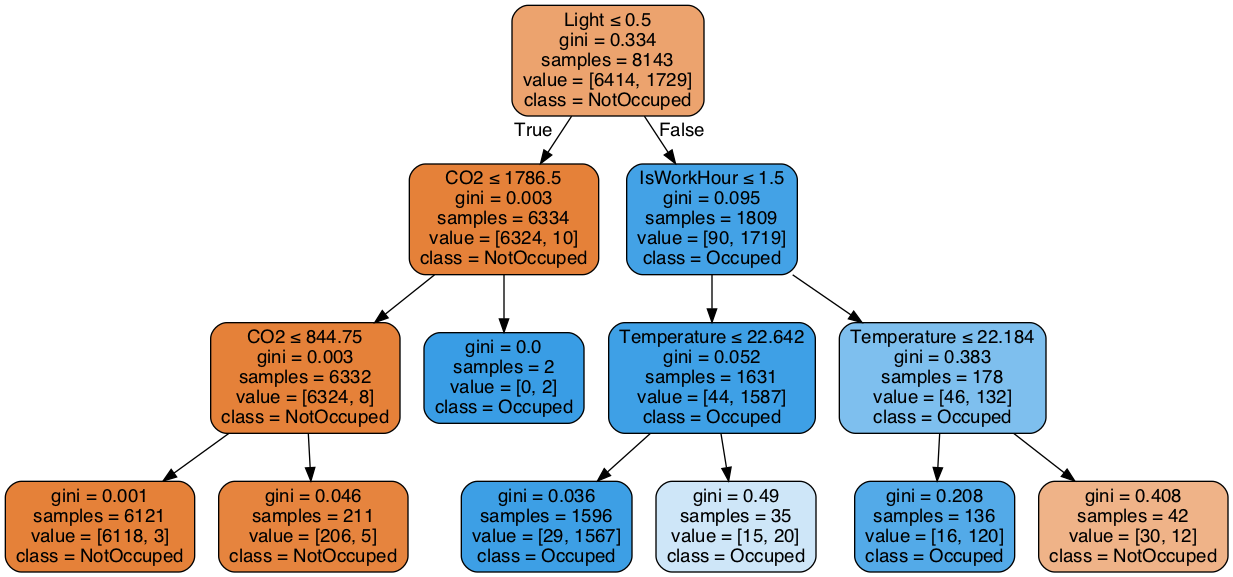

In [12]:
#Let's see the decision tree
dot_data = tree.export_graphviz(clfG, out_file=None,  
                                feature_names=attributes, 
                                class_names=['NotOccuped' if x == 0 else 'Occuped' for x in clfG.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
#Print the roc value
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_predG)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_predG, average=None)

0.9582652728859332


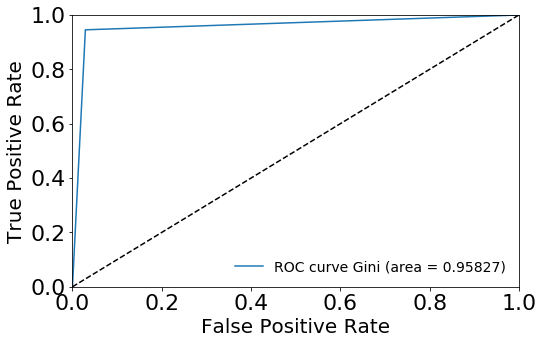

In [15]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Gini (area = %0.5f)' % roc_auc)
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

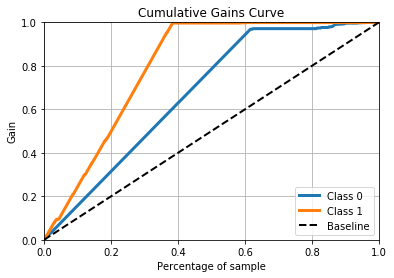

In [16]:
#Plotting the lift chart
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_predGproba)

In [17]:
#try the alghoritm with criterion=entropy
clfE = DecisionTreeClassifier(criterion='entropy', max_depth= 7, 
                             min_samples_split=2, min_samples_leaf=1)
clfE.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
#view the importace of the attributes
for col, imp in zip(attributes, clfE.feature_importances_):
    print(col, imp)

IsWorkDay 0.0
Hour 0.0014343867132052756
IsWorkHour 0.014049982643090052
Temperature 0.030913198332066367
Humidity 0.010815538685352032
Light 0.914252544592709
CO2 0.02853434903357728


In [19]:
y_predE = clfE.predict(X_test)
y_predEproba = clfE.predict_proba(X_test)

In [20]:
#Print accuracy, F1 score, precision, recall, support anda the confusion matrix
print('Accuracy %s' % accuracy_score(y_test, y_predE))
print('F1-score %s' % f1_score(y_test, y_predE, average=None))
print(classification_report(y_test, y_predE))
confusion_matrix(y_test, y_predE)

Accuracy 0.9287054409005628
F1-score [0.94555874 0.89673913]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1693
           1       0.95      0.85      0.90       972

    accuracy                           0.93      2665
   macro avg       0.93      0.91      0.92      2665
weighted avg       0.93      0.93      0.93      2665



array([[1650,   43],
       [ 147,  825]])

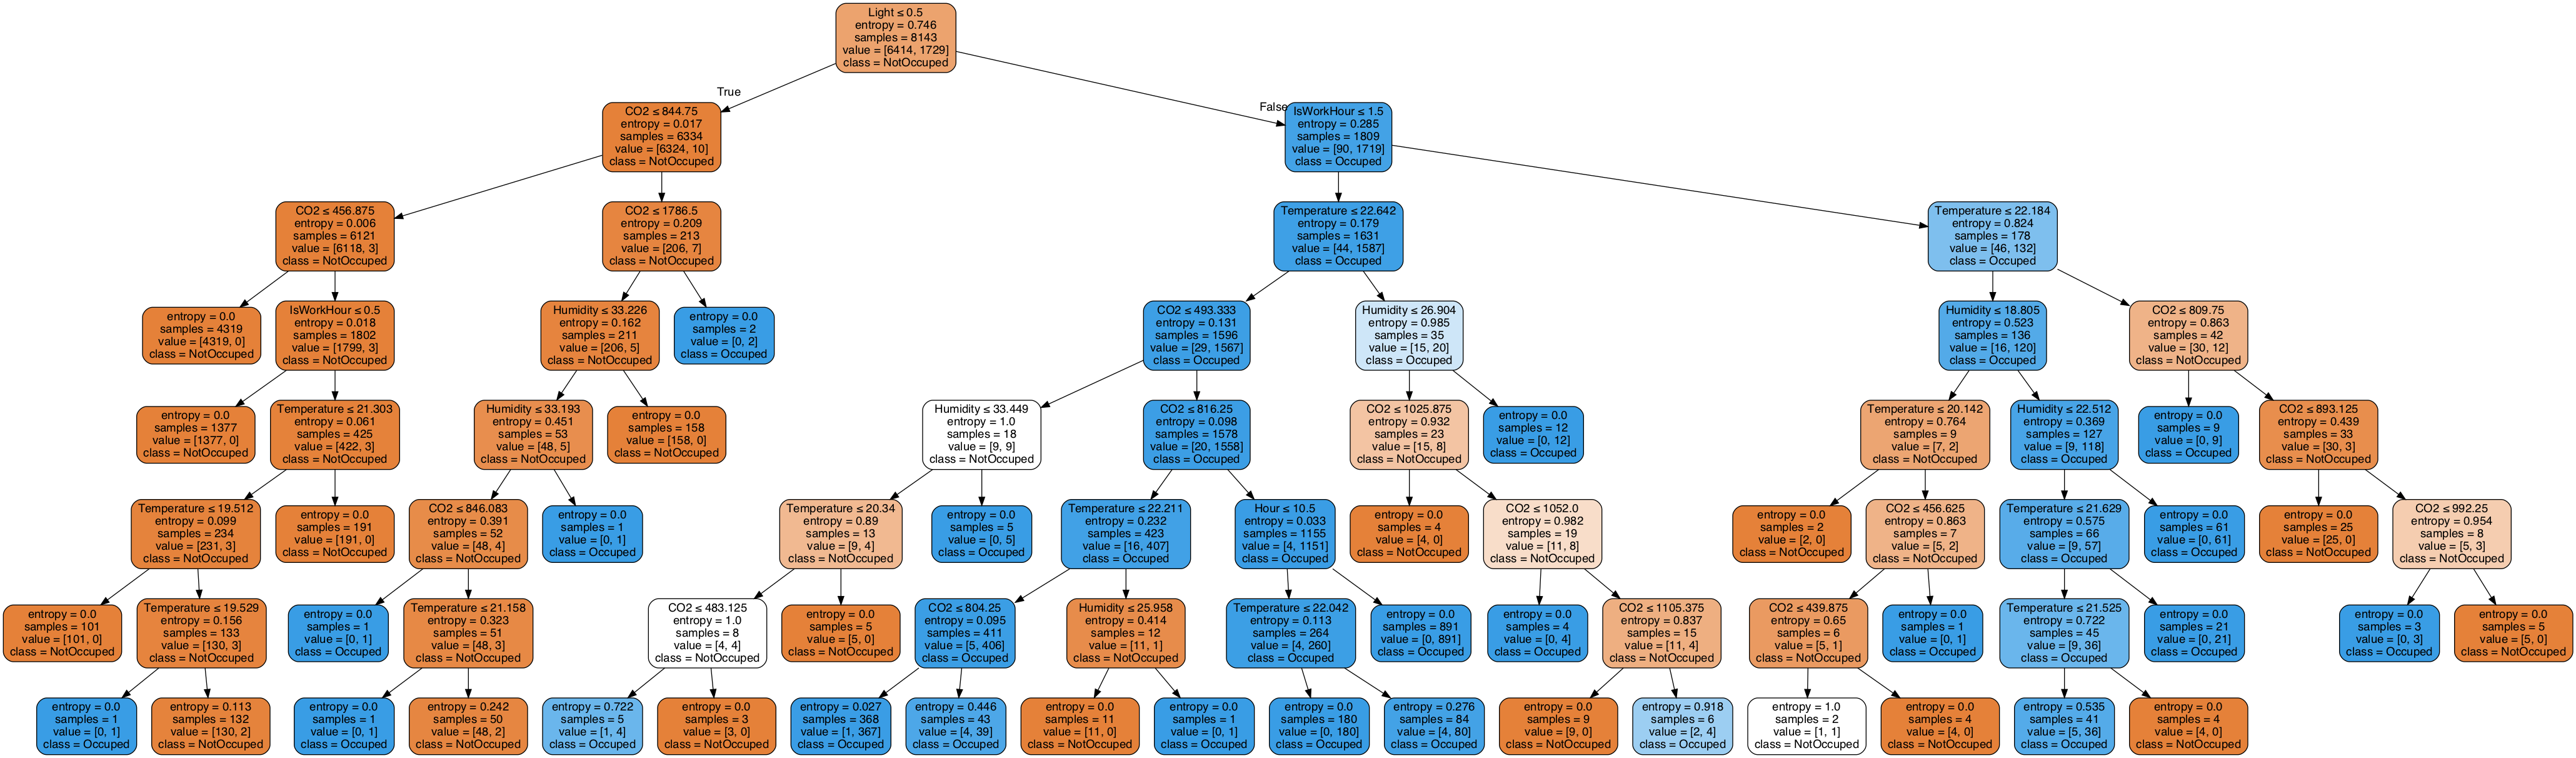

In [21]:
#Let's see the decision tree
dot_data = tree.export_graphviz(clfE, out_file=None,  
                                feature_names=attributes, 
                                class_names=['NotOccuped' if x == 0 else 'Occuped' for x in clfE.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [22]:
from sklearn.preprocessing import LabelBinarizer
#Print the roc value
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()
fpr, tpr, _ = roc_curve(y_test, y_predE)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(y_test, y_predE, average=None)

0.9116833657835823


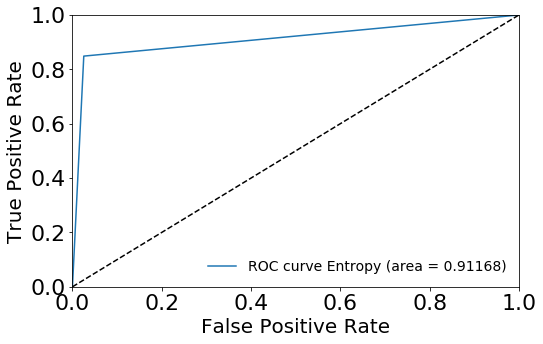

In [23]:
#Plotting the graph of the Roc curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve Entropy (area = %0.5f)' % roc_auc)
#plt.plot(fprE, tprE, label='ROC curve Gain (area = %0.5f)' % (roc_aucE))
#plt.plot(fprRF, tprRF, label='ROC curve Random Forest (area = %0.5f)' % (roc_aucRF))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

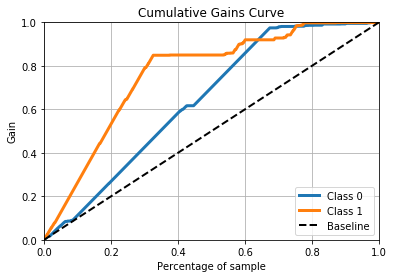

In [24]:
#Plotting the lift chart
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_predEproba)

In [25]:
attributes = [col for col in df.columns if col != 'Occupancy']
X_train = df[attributes]
y_train = df['Occupancy']

attributes = [col for col in test.columns if col != 'Occupancy']
X_test = test[attributes]
y_test = test['Occupancy']

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

features_combs_list = [
    ('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2')
]

hyper_params_space = [
    {
        'max_depth': np.arange(3, 100),
        'min_samples_split': np.arange(2, 5),
        'criterion': ['gini', 'entropy']
    },
]

for features in features_combs_list:
    print(features)
    print('===================================')
    X = X_train.loc[:, features]
    X_t = X_test.loc[:, features]
    X_t2 = X_test2.loc[:, features]

    tree = GridSearchCV(DecisionTreeClassifier(), hyper_params_space,
                       scoring='accuracy')
    tree.fit(X, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print()
    
    preds = [
        (tree.predict(X), y_train, 'Train'),
        (tree.predict(X_t), y_test, 'Test1'),
        (tree.predict(X_t2), y_test2, 'Test2')
    ]
    
    for pred in preds:
        print(pred[2] + ' Classification Report:')
        print()
        print('Accuracy %s' % accuracy_score(pred[1], pred[0]))
        print()
        print(classification_report(pred[1], pred[0]))
        print()
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print()

('IsWorkDay', 'Hour', 'IsWorkHour', 'Temperature', 'Humidity', 'Light', 'CO2')


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

Train Classification Report:

Accuracy 0.9901756109541938

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6414
           1       0.97      0.99      0.98      1729

    accuracy                           0.99      8143
   macro avg       0.98      0.99      0.99      8143
weighted avg       0.99      0.99      0.99      8143


Train Confusion Matrix:
[[6354   60]
 [  20 1709]]

Test1 Classification Report:

Accuracy 0.9617260787992495

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1693
           1       0.95      0.95      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.96      0.96      2665
weighted avg       0.96      0.96      0.96      2665


Test1 Confusion Matrix:
[[1644   49]
 [  53  919]]

Test2 Classification Report:

Accur